In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
import math as m
import pandas as pd
import scipy.stats as stat
import scipy.optimize as opt
import seaborn as sb
from scipy.integrate import quad
from scipy.integrate import dblquad
from scipy.special import comb
from sklearn.linear_model import LinearRegression
#plt.style.use('ggplot')

my_norm = lambda exp, disp: stat.norm(loc = exp, scale = m.sqrt(disp))

$f_X(x) = C (x + 1/2) \quad 
1 = C (1/2 + 1/2) \Rightarrow C = 1$

$F_X(x) = x/2 + x^2/2 = 0.5 (1/4 + x + x^2) - 1/8 \quad
F^{-1}_X(y) = \sqrt{2y + 1/4} - 1/2$

$f_{Y|X}(y|x) = \dfrac{x + y}{x + 1/2} \quad
F_{Y|X}(y|x) = \dfrac{xy}{x + 1/2} + \dfrac{y^2/2}{x + 1/2} \quad
F^{-1}_{Y|X} (y) = \sqrt{R_2 (2x + 1) + x^2} - x
$

Искомое распределение: $(\sqrt{2R_1 + 1/4} - 1/2, \sqrt{R_2 (2x + 1) + x^2} - x)$, где $R_1, R_2 \sim R[0, 1]$

In [13]:
def gen(n):
    g_sample = [[], []]
    for i in range(n):
        x = m.sqrt(2 * stat.uniform().rvs() + 0.25) - 0.5
        #R2 = stat.uniform().rvs()
        g_sample[0].append(x)
        g_sample[1].append(m.sqrt(stat.uniform().rvs() * (2 * x + 1) + x * x) - x)
        
    return g_sample

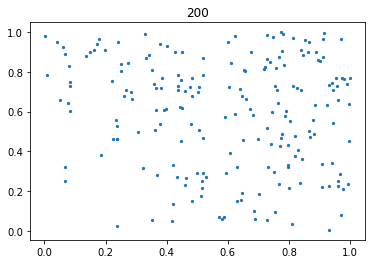

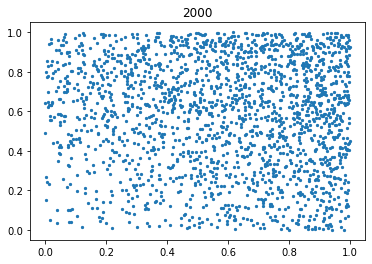

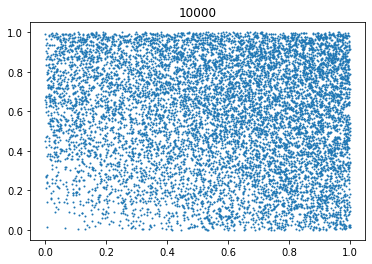

In [26]:
for n in [200, 2000]:
    sample = gen(n)
    plt.scatter(sample[0], sample[1], s = 5)#, title = str(n));
    plt.title(str(n))
    plt.show()
    
sample = gen(10000)
plt.scatter(sample[0], sample[1], s = 1)#, title = '10000');
plt.title(str(10000))
plt.show()

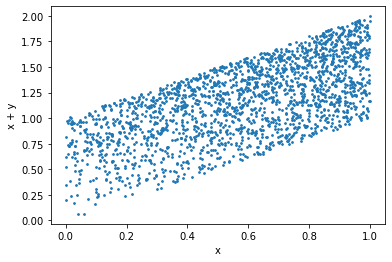

In [43]:
sample = gen(2000)

plt.scatter(sample[0], [a + b for a, b in zip(sample[0], sample[1])], s = 3);
plt.xlabel('x')
plt.ylabel('x + y')
plt.show()

Похоже на то, что нужно